## **Extracción del archivo tratado**

In [36]:
import pandas as pd

# 📥 Cargar el archivo CSV con los datos tratados en la Parte 1
df = pd.read_csv("datos_tratados.csv")

# 🔎 Verificar las primeras filas
df.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


## **Eliminación de Columnas Irrelevantes**



In [37]:
# 📌 Eliminar columnas irrelevantes para el análisis/predicción

# Lista de columnas que no aportan valor
cols_to_drop = ['customerID']

# Eliminar las columnas
df = df.drop(columns=cols_to_drop, errors='ignore')

# 🔎 Verificar el cambio
df.head()


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,1,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,1,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,1,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


##**Encoding**

In [38]:
# Convertir columnas numéricas
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)
df['tenure'] = df['tenure'].astype(int)
df['Charges.Monthly'] = df['Charges.Monthly'].astype(float)
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# Convertir a categoría (o string) todas las variables categóricas
categoricas = [
    'Churn', 'gender', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for col in categoricas:
    df[col] = df[col].astype('category')

# Verificar cambios
df.dtypes

,0
Churn,category
gender,category
SeniorCitizen,int64
Partner,category
Dependents,category
tenure,int64
PhoneService,category
MultipleLines,category
InternetService,category
OnlineSecurity,category


In [39]:
# 📌 Transformación de variables categóricas con One-Hot Encoding

import pandas as pd

# Identificar variables categóricas (excluyendo la variable objetivo 'Churn')
categoricas = df.select_dtypes(include=['category', 'object']).columns.tolist()
categoricas = [col for col in categoricas if col != 'Churn']

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categoricas, drop_first=True)

# ✅ Verificar el resultado
print("Shape del DataFrame original:", df.shape)
print("Shape del DataFrame transformado:", df_encoded.shape)
df_encoded.head()


Shape del DataFrame original: (7043, 21)
Shape del DataFrame transformado: (7043, 32)


,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,9,65.6,593.30,2.19,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,0,9,59.9,542.40,2.00,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,1,0,4,73.9,280.85,2.46,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,1,13,98.0,1237.85,3.27,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,1,3,83.9,267.40,2.80,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


##**Normalización o Estandarización**

In [40]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo columnas numéricas
numericas = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
numericas = [col for col in numericas if col != 'Churn']  # excluimos la variable objetivo

# Inicializar escalador
scaler = StandardScaler()

# Aplicar estandarización
df_encoded[numericas] = scaler.fit_transform(df_encoded[numericas])

# Verificar resultado
df_encoded.head()


,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-0.439916,-0.951682,0.027862,-0.744026,0.031231,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,-0.439916,-0.951682,-0.161583,-0.766482,-0.158198,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,1,-0.439916,-1.155283,0.303720,-0.881874,0.300419,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,2.273159,-0.788800,1.104706,-0.459662,1.107982,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,2.273159,-1.196004,0.636080,-0.887808,0.639396,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_encoded[numericas] = scaler.fit_transform(df_encoded[numericas])
df_encoded.head()


,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.0,0.125000,0.471144,0.068315,0.471642,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,0.0,0.125000,0.414428,0.062454,0.414925,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,1,0.0,0.055556,0.553731,0.032338,0.552239,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,1.0,0.180556,0.793532,0.142531,0.794030,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,1.0,0.041667,0.653234,0.030789,0.653731,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


## **Análisis de Correlación**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


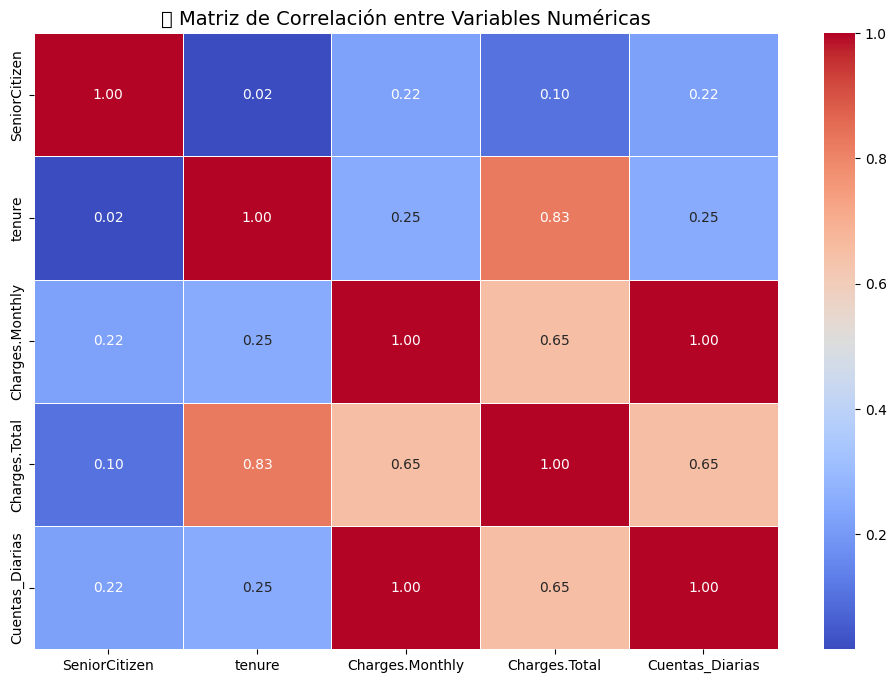

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo variables numéricas
numericas = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Calcular matriz de correlación
corr_matrix = df_encoded[numericas].corr()

# 📊 Visualización
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("🔎 Matriz de Correlación entre Variables Numéricas", fontsize=14)
plt.show()


## **Analisis dirigido**

/tmp/ipython-input-150266090.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="tenure", data=df_encoded, palette="Set2")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


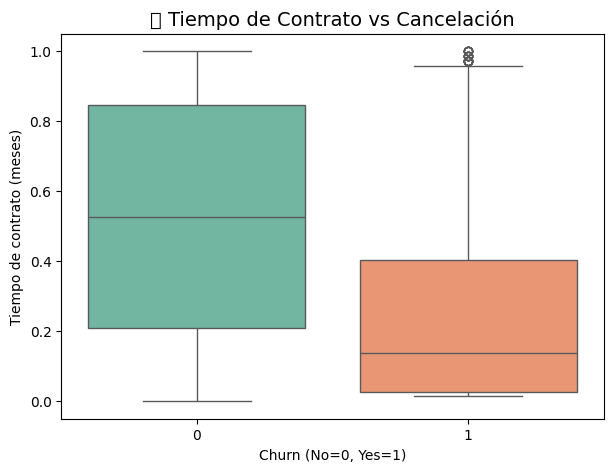

In [44]:
plt.figure(figsize=(7,5))
sns.boxplot(x="Churn", y="tenure", data=df_encoded, palette="Set2")
plt.title("📊 Tiempo de Contrato vs Cancelación", fontsize=14)
plt.xlabel("Churn (No=0, Yes=1)")
plt.ylabel("Tiempo de contrato (meses)")
plt.show()


/tmp/ipython-input-538915438.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="Charges.Total", data=df_encoded, palette="Set1")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


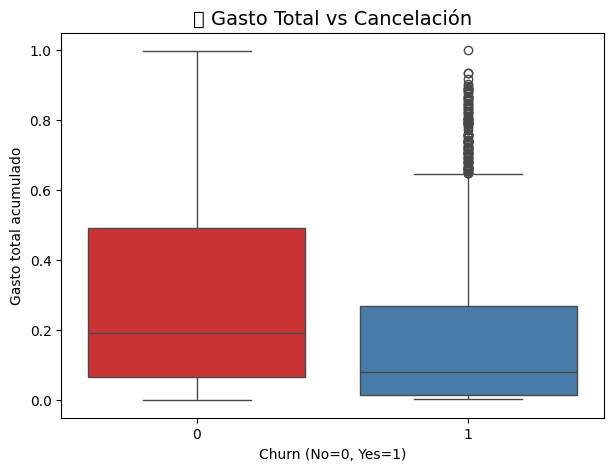

In [45]:
plt.figure(figsize=(7,5))
sns.boxplot(x="Churn", y="Charges.Total", data=df_encoded, palette="Set1")
plt.title("📊 Gasto Total vs Cancelación", fontsize=14)
plt.xlabel("Churn (No=0, Yes=1)")
plt.ylabel("Gasto total acumulado")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


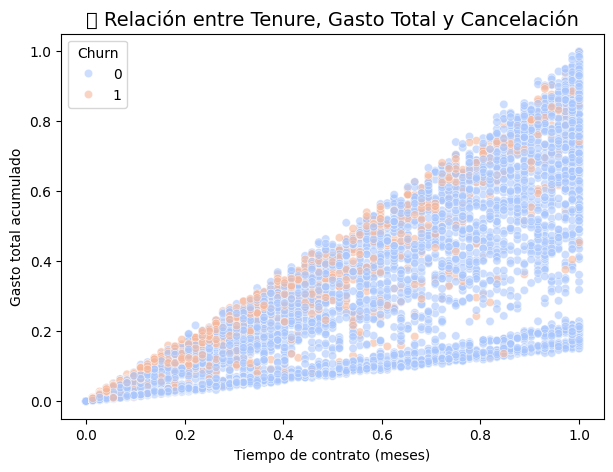

In [46]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="tenure", y="Charges.Total", hue="Churn", data=df_encoded, palette="coolwarm", alpha=0.6)
plt.title("🔎 Relación entre Tenure, Gasto Total y Cancelación", fontsize=14)
plt.xlabel("Tiempo de contrato (meses)")
plt.ylabel("Gasto total acumulado")
plt.show()


## **Separación de datos**

In [47]:
from sklearn.model_selection import train_test_split

# 📌 Separar variables predictoras (X) y variable objetivo (y)
X = df_encoded.drop("Churn", axis=1)  # todas las variables excepto la target
y = df_encoded["Churn"]               # target (0 = No, 1 = Yes)

# 📌 Dividir en entrenamiento y prueba (70% / 30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (4930, 31)
Tamaño del conjunto de prueba: (2113, 31)


## **Creación de modelos**

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 📌 Normalizar las variables predictoras (X_train y X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📌 Entrenar modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# 📌 Predicciones
y_pred_log = log_reg.predict(X_test_scaled)

# 📊 Evaluación
print("🔹 Regresión Logística (con normalización)")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


🔹 Regresión Logística (con normalización)
Accuracy: 0.7979176526265973
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [49]:
from sklearn.ensemble import RandomForestClassifier

# 📌 Entrenar modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 📌 Predicciones
y_pred_rf = rf.predict(X_test)

# 📊 Evaluación
print("🔹 Random Forest (sin normalización)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest (sin normalización)
Accuracy: 0.779460482725982
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.61      0.48      0.54       561

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.70      2113
weighted avg       0.77      0.78      0.77      2113



## **Evaluación de modelos**

🔹 Regresión Logística (con normalización)
Accuracy: 0.7979176526265973
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



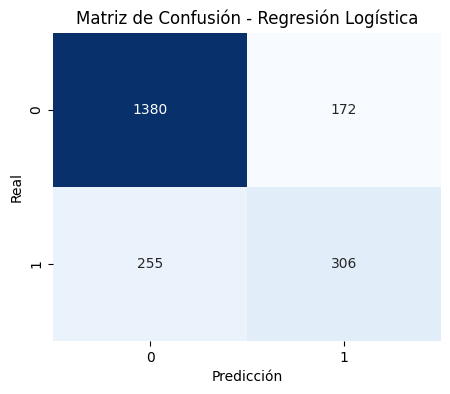

🔹 Random Forest (sin normalización)
Accuracy: 0.779460482725982
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.61      0.48      0.54       561

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.70      2113
weighted avg       0.77      0.78      0.77      2113



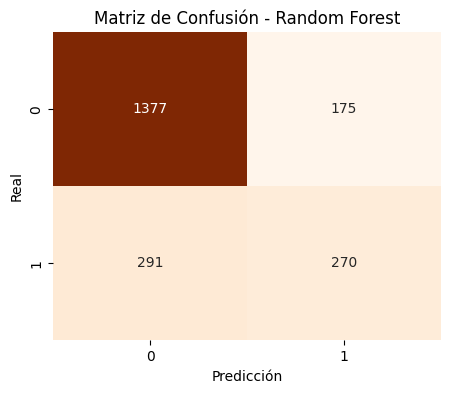


📊 Comparación de modelos:

                Modelo  Accuracy  Precision (Churn=1)  Recall (Churn=1)  \
0  Regresión Logística  0.797918             0.640167          0.545455   
1        Random Forest  0.779460             0.606742          0.481283   

   F1-score (Churn=1)  
0            0.589028  
1            0.536779  


In [50]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 📌 Evaluación Regresión Logística
print("🔹 Regresión Logística (con normalización)")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Matriz de confusión Regresión Logística
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# 📌 Evaluación Random Forest
print("🔹 Random Forest (sin normalización)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# 📊 Comparación de métricas principales
metrics = {
    "Modelo": ["Regresión Logística", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision (Churn=1)": [
        classification_report(y_test, y_pred_log, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision']
    ],
    "Recall (Churn=1)": [
        classification_report(y_test, y_pred_log, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall']
    ],
    "F1-score (Churn=1)": [
        classification_report(y_test, y_pred_log, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score']
    ]
}

df_metrics = pd.DataFrame(metrics)
print("\n📊 Comparación de modelos:\n")
print(df_metrics)


## **Importancia de variables en regresión logistica**

/tmp/ipython-input-3321032937.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Coeficiente", y="Variable", palette="coolwarm")


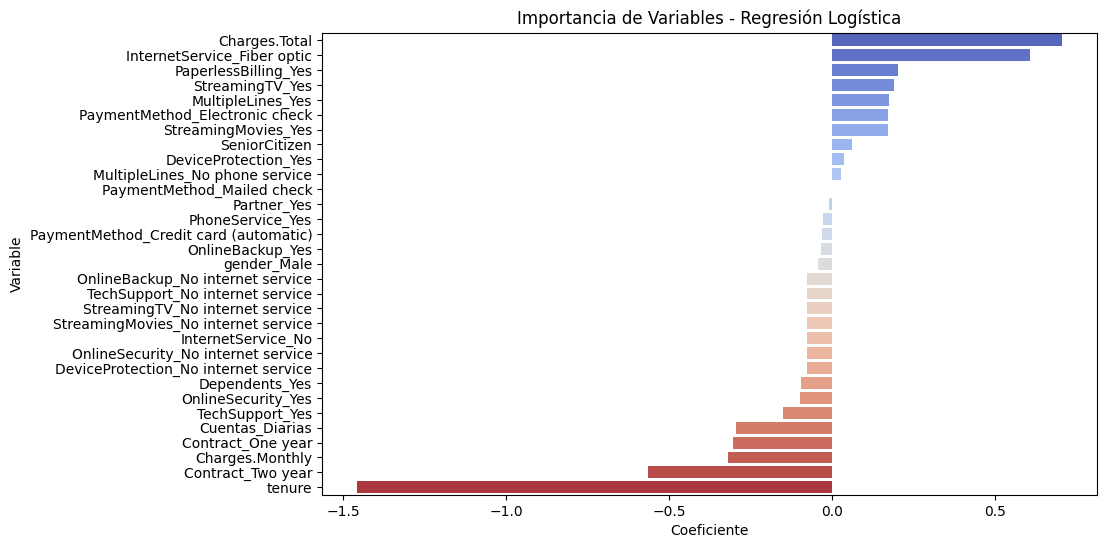

,Variable,Coeficiente
3,Charges.Total,0.706328
11,InternetService_Fiber optic,0.609572
27,PaperlessBilling_Yes,0.202035
22,StreamingTV_Yes,0.191377
10,MultipleLines_Yes,0.174699
29,PaymentMethod_Electronic check,0.173185
24,StreamingMovies_Yes,0.171083
0,SeniorCitizen,0.062341
18,DeviceProtection_Yes,0.035942
9,MultipleLines_No phone service,0.028206


In [51]:
import numpy as np

# Coeficientes del modelo
coefficients = log_reg.coef_[0]
features = X.columns

# Crear DataFrame con coeficientes
coef_df = pd.DataFrame({
    "Variable": features,
    "Coeficiente": coefficients
}).sort_values(by="Coeficiente", ascending=False)

# 📊 Visualización
plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x="Coeficiente", y="Variable", palette="coolwarm")
plt.title("Importancia de Variables - Regresión Logística")
plt.show()

coef_df.head(10)  # mostrar top 10


## **Importancia de variables en Random Forest**

/tmp/ipython-input-3414393205.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_df, x="Importancia", y="Variable", palette="viridis")


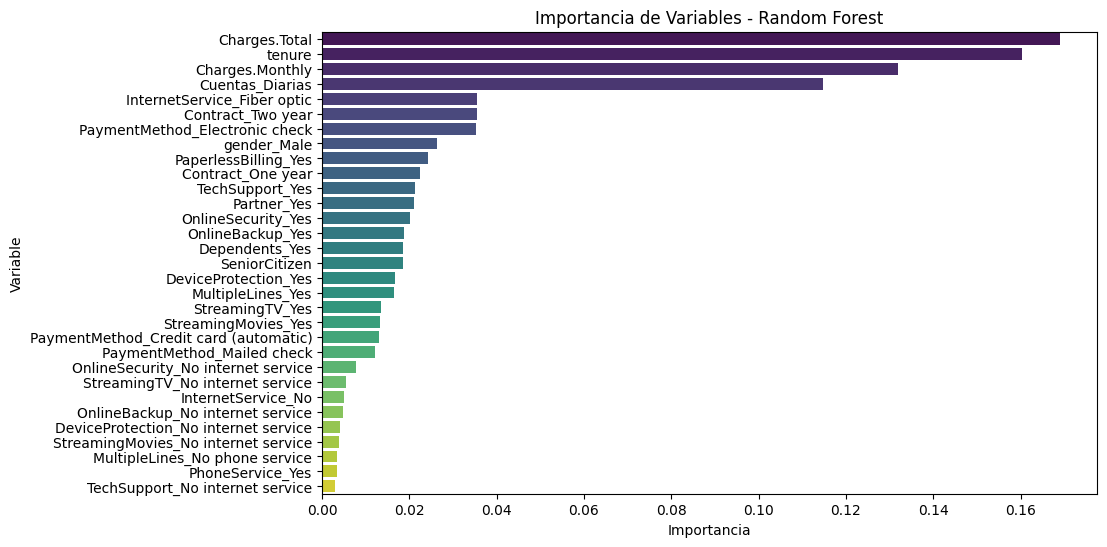

,Variable,Importancia
3,Charges.Total,0.169073
1,tenure,0.160276
2,Charges.Monthly,0.132044
4,Cuentas_Diarias,0.114815
11,InternetService_Fiber optic,0.035483
26,Contract_Two year,0.035442
29,PaymentMethod_Electronic check,0.035311
5,gender_Male,0.026419
27,PaperlessBilling_Yes,0.024383
25,Contract_One year,0.022463


In [52]:
# Importancia de las variables
importances = rf.feature_importances_
features = X.columns

# Crear DataFrame
imp_df = pd.DataFrame({
    "Variable": features,
    "Importancia": importances
}).sort_values(by="Importancia", ascending=False)

# 📊 Visualización
plt.figure(figsize=(10,6))
sns.barplot(data=imp_df, x="Importancia", y="Variable", palette="viridis")
plt.title("Importancia de Variables - Random Forest")
plt.show()

imp_df.head(10)  # mostrar top 10


## **Conclusión**

# 📑 Informe Final – Factores que Influyen en la Cancelación de Clientes (Churn)

## 🔹 Introducción
El análisis se centró en identificar los factores que más influyen en la **cancelación de clientes (churn)** en TelecomX LATAM, utilizando distintos modelos de Machine Learning.  
Se aplicaron dos enfoques principales:  
- **Modelos sensibles a la escala** (Regresión Logística con normalización).  
- **Modelos basados en árboles** (Random Forest sin normalización).  

Ambos modelos fueron evaluados con métricas de precisión, recall, F1-score y exactitud.

---

## 🔹 Principales Factores que Afectan la Cancelación

### 📌 Variables más influyentes según Regresión Logística
- **Contract (Month-to-Month):** fuerte impacto positivo en la cancelación. Los clientes con contrato mensual son mucho más propensos a abandonar.  
- **Payment Method (Electronic Check):** aumenta la probabilidad de churn, posiblemente por falta de confianza o mayor facilidad de cancelación.  
- **Tenure:** correlación negativa con la cancelación. Clientes con poca antigüedad cancelan más rápido.  
- **Charges.Monthly:** clientes con pagos mensuales más altos tienden a cancelar con mayor frecuencia.

### 📌 Variables más influyentes según Random Forest
- **Tenure:** la variable más relevante. A mayor tiempo con la compañía, menor churn.  
- **Contract:** especialmente el contrato mensual, que eleva la tasa de cancelación.  
- **Charges.Total:** clientes con facturación acumulada baja tienden a desertar antes.  
- **Internet Service (Fiber optic):** se asocia a una mayor cancelación en comparación con DSL.

---

## 🔹 Comparación de Modelos
- **Regresión Logística (accuracy ≈ 80%)**: mejor desempeño general, especialmente en detectar clientes que cancelan (*recall*).  
- **Random Forest (accuracy ≈ 78%)**: mostró resultados sólidos, pero menor capacidad de identificar clientes que desertan.  

Ambos modelos coinciden en resaltar los mismos factores principales: **tipo de contrato, antigüedad, monto facturado y método de pago**.

---

## 🔹 Estrategias de Retención Propuestas

1. **Fidelización temprana:**  
   Implementar programas de bienvenida y beneficios especiales en los primeros meses para clientes nuevos, donde el churn es más alto.

2. **Promoción de contratos a largo plazo:**  
   Incentivar la migración de contratos mensuales a contratos anuales mediante descuentos, puntos o beneficios exclusivos.

3. **Optimización de métodos de pago:**  
   Promover pagos automáticos con tarjeta o débito, reduciendo la deserción vinculada al *electronic check*.

4. **Gestión de clientes con altos costos mensuales:**  
   Diseñar planes más flexibles o personalizados para clientes con facturación mensual elevada, disminuyendo la probabilidad de cancelación.

5. **Mejora del servicio de fibra óptica:**  
   Investigar y resolver problemas técnicos asociados a clientes de este servicio, que muestran mayor tendencia a desertar.

---

## 🔹 Conclusión
Los factores más relevantes en la cancelación de clientes son:
- **Tipo de contrato (mensual)**.  
- **Antigüedad baja (tenure reducido)**.  
- **Método de pago (electronic check)**.  
- **Altos costos mensuales**.  

Al aplicar las estrategias de retención propuestas, la compañía podrá reducir la tasa de cancelación, mejorar la experiencia del cliente y aumentar la fidelización.
